# Machine Learning and Content Analytics – Mini Project

# Offensive language and hate speech detection 
---
> Students: `Arkoumani Georgia - p2822104` `Poulou Myrto - p2822129` `Koutsodimitropoulou Anastasia - p2822119` `Zaragka Eftychia - p2822112` <br />
> Professor: Haris Papageorgiou (xaris@ilsp.gr) <br />
> Assistant responsible for this assignment: George Perakis (gperakis@aueb.gr) <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> Date: 28/08/2022


*   Import all the required libraries and install packages

In [ ]:
#Installing libraries for text matters
!pip install pyspellchecker
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Basic Pydata Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import html
import unicodedata
# Visualizations
import matplotlib.pyplot as plt
# Regular expressions
import re
# Handling string
import string
# Performing mathematical operations
import math

In [ ]:
# Importing spacy
import spacy
# Libraries for nltk
import nltk
import os
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import pos_tag
# Passing the string text into word tokenize for breaking the sentences
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
# Libraries for text fixes
from textblob import TextBlob
from textblob import Word
from spellchecker import SpellChecker
from autocorrect import Speller
# Vectorising 
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import warnings
# Ignore future warning in order not to interrupt the flow
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

Import and load the created dataset in <u>***1. Data preparation***</u>


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_cleaned_df.zip to final_cleaned_df.zip


In [ ]:
!unzip "final_cleaned_df.zip"

Archive:  final_cleaned_df.zip
  inflating: final_cleaned_df.csv    


In [ ]:
# Load csv file
cleaned_df = pd.read_csv('final_cleaned_df.csv')
# viewing an excerpt of the data
cleaned_df.head()

,comment,category
0,yes indeed she sort of reminds me of the elder...,0
1,ladies buy a gun learn how to use it effective...,0
2,you are an amazing dad dont forget that girls ...,0
3,delon love turkey and brave turks from indian ...,0
4,heres the thing there is only one person on ea...,0


## Dataset Analysis

In [ ]:
#Information of dataset
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264714 entries, 0 to 2264713
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   comment   object
 1   category  int64 
dtypes: int64(1), object(1)
memory usage: 34.6+ MB


* Detecting missing values & duplicated information

In [ ]:
cleaned_df.isnull().sum()

comment     15
category     0
dtype: int64

In [ ]:
#Viewing null values & their category
cleaned_df[cleaned_df["category"].notna() & cleaned_df["comment"].isna()]

,comment,category
95339,NaN,0
183110,NaN,0
188955,NaN,0
198559,NaN,0
199754,NaN,0
202127,NaN,0
207641,NaN,0
224232,NaN,0
226727,NaN,0
229786,NaN,0


In [ ]:
#Dropping null values
cleaned_df.dropna(inplace=True)
#ensuring the drop
cleaned_df.isnull().sum()

comment     0
category    0
dtype: int64

In [ ]:
# Alternative way
print("Are there any missing values in the dataset?",cleaned_df.isnull().values.any()) 

Are there any missing values in the dataset? False


In [ ]:
#Detecting unique comments
cleaned_df['comment'].unique()

array(['yes indeed she sort of reminds me of the elder lady that played the part in the movie titanic who was telling her story and i wouldnt have wanted to cover who i really am i would be proud we should be proud of our race no matter what it is',
       'ladies buy a gun learn how to use it effectively and kill these mother fuckers url',
       'you are an amazing dad dont forget that girls can have crushs on other girls too my mom always asked me is i like anyone rather than any boys and would always talk about when you bring home a boyfriend or girlfriend which got old once it became clear i was straight but was still the right approach',
       ..., 'women should be submissive to men',
       'women are essentially childlike unable to understand the complexity of the world',
       'women should not be allowed to vote this is a maledominated country and they have no place in our democracy'],
      dtype=object)

In [ ]:
#Check for duplicates
cleaned_df.duplicated(keep=False).sum()

69725

In [ ]:
#Dataset shap before alterations
cleaned_df.shape

(2264699, 2)

In [ ]:
# Calculating the percentage of duplicated info so to decide the drop of them
percentage = cleaned_df.duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    96.921224
True      3.078776
dtype: float64


In [ ]:
# The duplicated info can be consider trivial so we proceed with the excluded them
cleaned_df = cleaned_df.drop_duplicates() 

* Standard statistical analysis

In [ ]:
# Show basic statistics measures of the numerical attributes
# Identifying the trend of the data
pd.set_option('display.float_format', lambda x: '%.2f' % x) # specifying the format of the describe function's output
cleaned_df.describe()

,category
count,2213311.00
mean,0.02
std,0.15
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


By observing the above basic statistic metrics for `category` info, we can see that an imbalanced dataset exists with the majority of comments to be characterized by the `client` as non hateful.  

* Display of imbalance

In [ ]:
# Creating function that anotates the percentages in the graph
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        #divide the bar height with the total length
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        # for defining the position of displayed values
        x = p.get_x() + p.get_width() / 2 - 0.05 
        # for defining the position of displayed values
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 12)

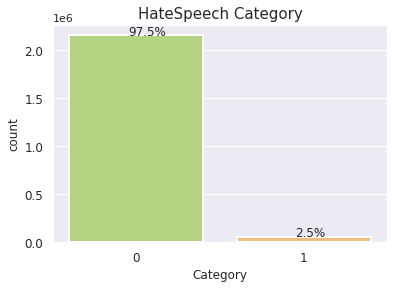

In [ ]:
# Plotting the imbalance of the dataset
sns.set_theme(style="darkgrid")
ax=sns.countplot(cleaned_df.category, palette="RdYlGn_r", linewidth=2)
plt.xticks(size=12)
#Name of axis & configuartion
plt.xlabel("Category", size =12)
plt.yticks(size  =12 )
plt.ylabel('count',size =12)
#Add plot title
plt.title("HateSpeech Category", fontsize=15)
#Annotating percentages
without_hue(ax, cleaned_df.category)

In [ ]:
# Creating variables for text graphs to identify words frequence
X_negative= cleaned_df[cleaned_df['category']==1]
X_positive= cleaned_df[cleaned_df['category']==0]

(-0.5, 1599.5, 799.5, -0.5)

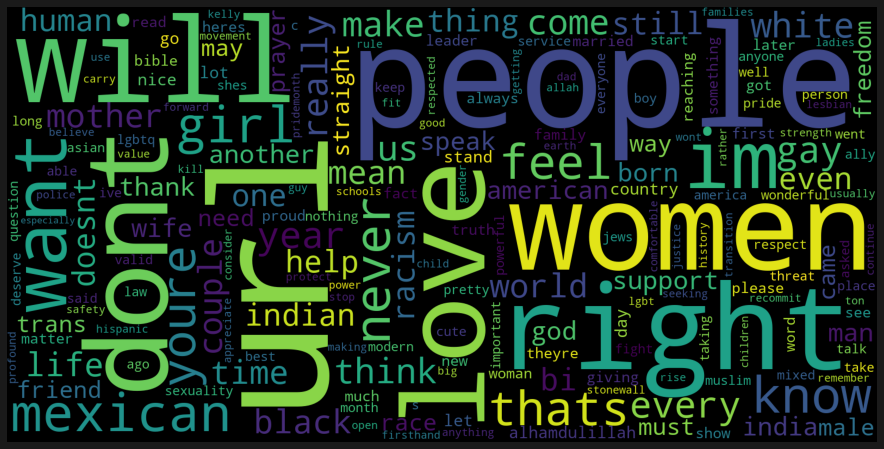

In [ ]:
# Visualizing the positive words from 100 positive comments
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(' '.join(X_positive['comment'][1:100].tolist()))
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

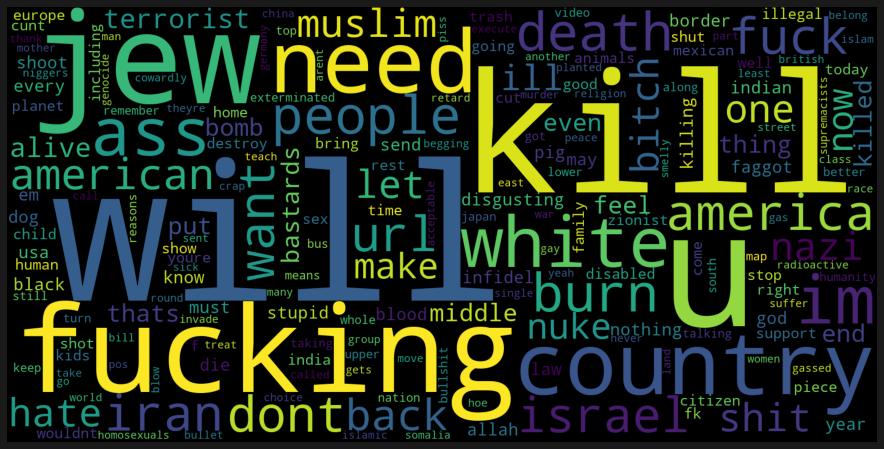

In [ ]:
# Visualizing the positive words from 100 negative comments
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(' '.join(X_negative['comment'][1:100].tolist()))
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

The above depicts existence of `stop words`, which will be excluded.

* Removing Stop Words & Performing Lemmatization

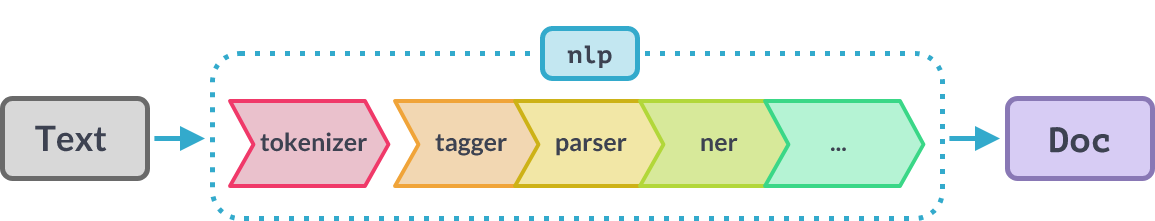

In [ ]:
# Loading model
#Creating  processing pipeline with the use of statistical component parser (DependencyParser) & ner (EntityRecognizer)
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner']) 

# Lemmatization with stopwords removal
cleaned_df['lemmatized']=cleaned_df['comment'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

The above was applied and the relevant dataset was produced and downloaded. Bellow the upload will follow:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lem_cleaned_df.zip to lem_cleaned_df.zip


In [ ]:
!unzip "lem_cleaned_df.zip"

Archive:  lem_cleaned_df.zip
  inflating: lem_cleaned_df.csv      


In [ ]:
# Load csv file
lem_cleaned_df = pd.read_csv('lem_cleaned_df.csv')
# viewing an excerpt of the data
lem_cleaned_df.head()

,comment,category,lemmatized
0,yes indeed she sort of reminds me of the elder...,0,yes sort remind eld lady play movie titanic te...
1,ladies buy a gun learn how to use it effective...,0,lady buy gun learn use effectively kill mother...
2,you are an amazing dad dont forget that girls ...,0,amazing dad not forget girl crushs girl mom as...
3,delon love turkey and brave turks from indian ...,0,delon love turkey brave turk indian muslim sha...
4,heres the thing there is only one person on ea...,0,here thing person earth decide s not matter fe...


In [ ]:
#Dropping the initial comment column with the processed one
lem_cleaned_df=lem_cleaned_df.drop(['comment'], axis=1)
lem_cleaned_df

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide s not matter fe...
...,...,...
2213306,1,woman want mother say want patriarchal society
2213307,1,woman basically childlike
2213308,1,woman submissive man
2213309,1,woman essentially childlike unable understand ...


In [ ]:
#Examing the new dataset details
lem_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213311 entries, 0 to 2213310
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   category    int64 
 1   lemmatized  object
dtypes: int64(1), object(1)
memory usage: 33.8+ MB


In [ ]:
lem_cleaned_df.shape

(2213311, 2)

In [ ]:
# Examining the existence of new missing values 
lem_cleaned_df.isnull().sum()

category         0
lemmatized    2081
dtype: int64

In [ ]:
#New missing values appeared so we proceed with their removal
lem_cleaned_df.dropna(inplace=True)
lem_cleaned_df

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide s not matter fe...
...,...,...
2213306,1,woman want mother say want patriarchal society
2213307,1,woman basically childlike
2213308,1,woman submissive man
2213309,1,woman essentially childlike unable understand ...


In [ ]:
#Check for duplicates
lem_cleaned_df['lemmatized'].duplicated(keep=False).sum()

33159

In [ ]:
# Calculating the percentage of duplicated info so to decide dropping them
percentage1 = lem_cleaned_df['lemmatized'].duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage1)

False    98.500427
True      1.499573
Name: lemmatized, dtype: float64


In [ ]:
# Dropping ALL duplicate values
lem_cleaned_df.drop_duplicates(subset ="lemmatized",keep = False, inplace = True)

In [ ]:
#Ensuring the elimination of duplicates
lem_cleaned_df['lemmatized'].duplicated(keep=False).sum()

0

In [ ]:
lem_cleaned_df.head(50)

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide s not matter fe...
5,0,hey college transiconnotch suspend decide come...
6,0,child respect school single child black asian ...
7,0,think bit confused lgbt ally friend okay s tru...
8,0,decision woman not want carry rapist offspring...
9,0,oppose restriction human service support eligi...


In [ ]:
# Preparing the variables for the Word Cloud graphs
X_negative= lem_cleaned_df[lem_cleaned_df['category']==1]
X_positive= lem_cleaned_df[lem_cleaned_df['category']==0]

Positive Cloud

(-0.5, 1599.5, 799.5, -0.5)

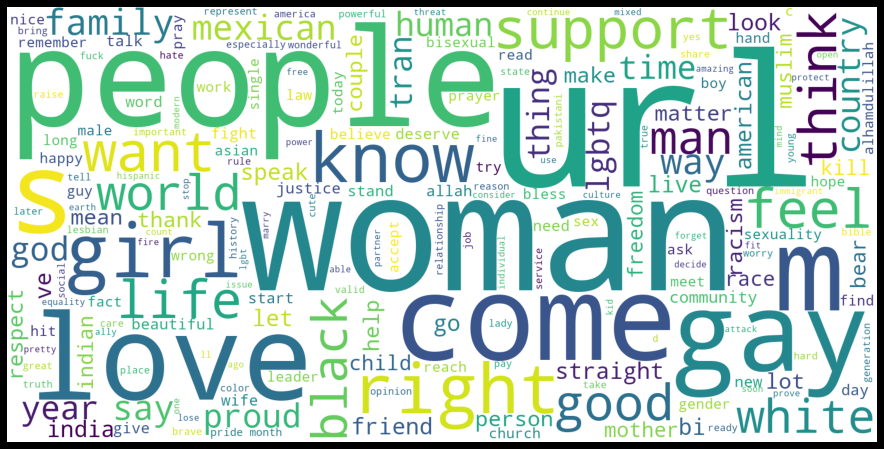

In [ ]:
# Visualizing the positive words from 200 positive comments
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(X_positive['lemmatized'][1:200].tolist()))
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

Negative Cloud

(-0.5, 1599.5, 799.5, -0.5)

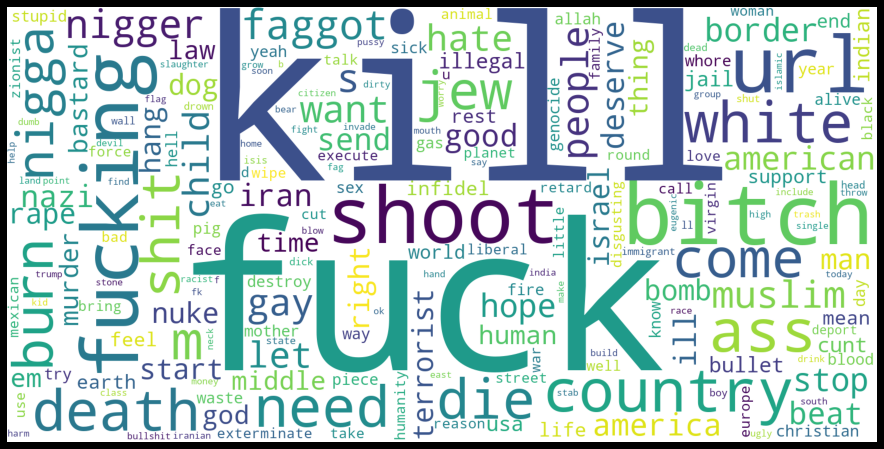

In [ ]:
# Visualizing the positive words from 200 negative comments
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(X_negative['lemmatized'][1:200].tolist()))
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

* From the above graphs we observe that words that are widely accepted as either `good` or `bad`, seem to have been correctly labelled, for the most part. At the same time, words appear in both categories implying that some words have double meaning, while there are words with no semantincs (i.e url)

* We will continue with checking texts' polarity.

## Checking polarity

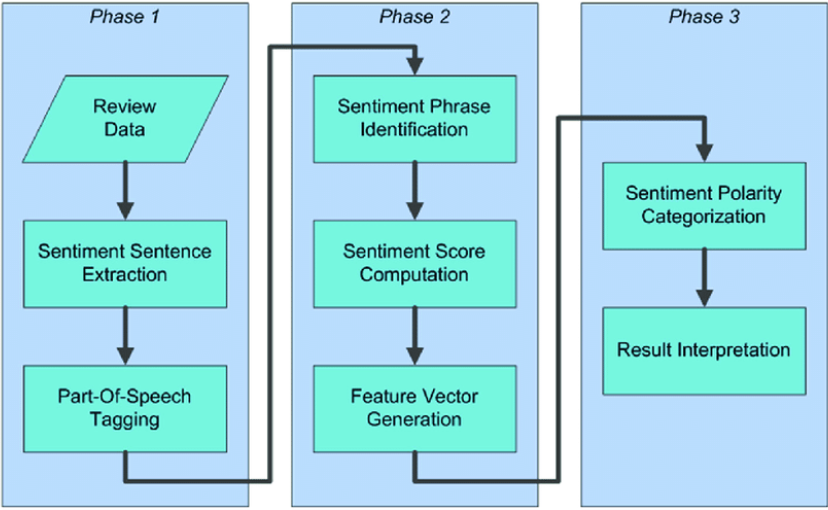

* The polarity score is a float within the range [-1.0, 1.0]. It is used to analyze the body of text in order to understand the opinion expressed, quantifying it with a `poitive` or `negative` value.

In [ ]:
# From the available package, the sentiment analysis will be, only, around polarity
lem_cleaned_df['polarity']=lem_cleaned_df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
# Taking a glimpse of the dataset
lem_cleaned_df.head(10)

,category,lemmatized,polarity
0,0,yes sort remind eld lady play movie titanic te...,0.800000
1,0,lady buy gun learn use effectively kill mother...,0.600000
2,0,amazing dad not forget girl crushs girl mom as...,0.257143
3,0,delon love turkey brave turk indian muslim sha...,0.650000
4,0,here thing person earth decide s not matter fe...,0.433333
5,0,hey college transiconnotch suspend decide come...,-0.057143
6,0,child respect school single child black asian ...,-0.047619
7,0,think bit confused lgbt ally friend okay s tru...,0.283333
8,0,decision woman not want carry rapist offspring...,0.416667
9,0,oppose restriction human service support eligi...,0.000000


In [ ]:
#Printing the comments with the highest score
print("3 Random Comments with Highest Polarity:")
for index,comment in enumerate(lem_cleaned_df.iloc[lem_cleaned_df['polarity'].sort_values(ascending=False)[:3].index]['lemmatized']):
  print('Comment {}:\n'.format(index+1),comment)

3 Random Comments with Highest Polarity:
Comment 1:
 indication project sustainable fact tear functional building replace precisely opposite sustainable
Comment 2:
 probably typo meet liberal fundraiser ottawa nearly seven year ago source refer reconnecting
Comment 3:
 gop plan cut healthcare middle class lower taxis list


In [ ]:
#Printing the comments with the lowest score
print("3 Random Comments with Lowest Polarity:")
for index,comment in enumerate(lem_cleaned_df.iloc[lem_cleaned_df['polarity'].sort_values(ascending=True)[:3].index]['lemmatized']):
  print('Comment {}:\n'.format(index+1),comment)

3 Random Reviews with Lowest Polarity:
Comment 1:
 trudeaus deficit predict go wrong
Comment 2:
 canadian idea shore account exist account pay taxis earn money thing kind sleazy surface look ready good thorough investigation t nation employer ask pay cheque send number company shore haven buy sell property trade stock free canadian tax law
Comment 3:
 nune release surmise demorcrat liberal mole nsa cia type surveillance community apparent unmasking name surveillence inappropiate leak info crime thedonald staff democrat party leader supporter expose lie deceive human being politic


* further cleaning seems to needed before finalizing the dataset for the modeling phase

In [ ]:
#Exploring the information of the created variable `polarity`
lem_cleaned_df[['polarity']].max()

polarity    1.0
dtype: float64

In [ ]:
lem_cleaned_df[['polarity']].min()

polarity   -1.0
dtype: float64

In [ ]:
lem_cleaned_df[['polarity']].mean()

polarity    0.044787
dtype: float64

* On average, the available comments seem to display a neutral sign.

## Plotting & Analyzing Polarity

In [ ]:
# Creating variables for graphs matters & using polatie's baselines
X_negative1= lem_cleaned_df[(lem_cleaned_df['category']==1) & (lem_cleaned_df['polarity']< -0.05)]
X_positive1= lem_cleaned_df[(lem_cleaned_df['category']==0)& (lem_cleaned_df['polarity']>0.05)]

In [ ]:
X_negative1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22460 entries, 80 to 2213309
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    22460 non-null  int64  
 1   lemmatized  22460 non-null  object 
 2   polarity    22460 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 701.9+ KB


In [ ]:
#Dropping column `category` in order to analyze only comment & polarity sections
X_negative2=X_negative1.drop(['category'], axis=1)

In [ ]:
# Keeping only isolated cases of polarity scores in order to limit the analysis even more
X_negative2.drop_duplicates(subset ="polarity",keep = False, inplace = True)

In [ ]:
comment_polarity_sorted=pd.DataFrame(X_negative2.groupby('lemmatized')['polarity'].mean().sort_values(ascending=True)[:10])
comment_polarity_sorted

,polarity
lemmatized,
disgusting man disgusting religion admit muslim buy wife pffthis muslim poorislam keep stupid,-0.933333
worst song history history history ear fall sokit wil wuz listenong stupid awful trash disguise halloween music awful hate katy perry y song prime cause deafness oo opo,-0.920000
retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed retard ed,-0.900000
retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard ed retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard ed retard ed retard edyour retard edyour retard ed retard edyour retard edyour retard ed retard edyour retard ed,-0.900000
suck martin bashir hope rot hell treat michael jackson god awful interview kill night begining michael tragic end blood hand,-0.875000
insane stupid imbecile witch bluerasberry describe term throbbing vagina,-0.866667
think horrible person not want cause wikihate not like way insult president insult fancy achive make sick ohh look archive annoying not realise,-0.838095
insane electoral college keep mad woman oval office,-0.812500
ahead delete account not wait m sick have check retard ed message people post page get delete get permanently blanked,-0.807143


* From the above we ensured that the dataset needs further cleaning to ease the modeling process. Bellow the same procedures are followed for the positive polaity scores

In [ ]:
X_positive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873084 entries, 0 to 2209636
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    873084 non-null  int64  
 1   lemmatized  873084 non-null  object 
 2   polarity    873084 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.6+ MB


In [ ]:
#Dropping column `category` in order to analyze only comment & polarity sections
X_positive2=X_positive1.drop(['category'], axis=1)

In [ ]:
# Keeping only isolated cases of polarity scores in order to limit the analysis even more
X_positive2.drop_duplicates(subset ="polarity",keep = False, inplace = True)

In [ ]:
comment_polarity_sorted1=pd.DataFrame(X_positive2.groupby('lemmatized')['polarity'].mean().sort_values(ascending=True)[:10])
comment_polarity_sorted1

,polarity
lemmatized,
trump interested great lie option great liar time columnist lie support trumps lie sense value think rr bad trump lie deft supporter bad pray pray usa world bad trumps hang year,0.050000
think probably right attention plight oregon aborigine generation nineteen fifty clear school kid live indian land treaty clear addition banning slavery territory original state constitution ban black live old history explain influx black oregon year world war ii not fair think discrimination simply critical mass minority population attract,0.050010
trump want change know maybe start premise supporter want change variety reason life not live expectation case simply get daily need meet pre want demonstrate s change agent promise c&aign good persuade canada appear grow chorus hear business circle maybe political circle s case smart set attempt feel s winner attempt provide cover not compromise mean provide fairly decent list additional f achievement change list exist know care think game team ready play,0.050027
david main agree way right religious right envision market totally fascist worship way carry market catholic philosophy ignoble mean possibly noble goal living family money value ignoble evil money immoral unethical poor value truly gop endless pursuit money s choke middle class dire straight ccs alignment hitler political power ex&le worship corporatist catholicism pope francis call culture clericalism human value value true importatance endeavor support human value defy demean ccs desire end communism socialism unionism exam le narow minded shortsighted action cause great damage,0.050031
evoke strong negative reaction damn right s go evoke strong negative reaction twitter set safe space opinion fact liberal uncomfortable long welcome yes right s absolutely disgraceful little regard tech company control public discourse private platform democratic party advance interest expense freedom speech reel fascist short nationalize twitter facebook t imagine twitter pick wrong woman cross ll marsha destroy,0.050033
insurance company cancel people sick absolutely right insurance company bet sick cancel policy insurance company force sell insurance prior aca old age pre exist conditon prompt creation medicare place year ago cover provision obama care glad survive glad insurance cancel exceed life time limit sorry knowledgeable cost medical care receive government possible medicare government get health insurance high risk pool lucky sell house premium good luck,0.050037
hammond think reluctantly bit strategy graduate income taxation sensible infrastructure alaska result investment alaskan people resource statehood earn money infrastructure include road school public safety department public water public power public land reasonably pay taxis dividend past investment personal cap pfd family cap reserve interest fund current investment limit perverse incentive increase demand resource have child certainly people visit alaska outside corporation money tourism pay access use public resource state true outsider make live fishing alaskan water line interest alaskan people,0.050050
disagree article old fashion myth ex&le person invite fancy dinner teach fancy dinner etiquette person google table etiquette good idea approach dinner edmonton community require certain portion dedicate affordable housing way live realize similar different design public school work kid similar experience friendship surpass call elite line long health care public education inclusive opioid epidemic fail level prescription drug company market highly addictive drug mds prescribe mass patient take drug dilligence btw get test,0.050054
good possible fallout hypocrite boeing complaint original political decision acquire new super hornet interim basis total non sense waste money begin require brand new interim logistic chain relate interim spare part provide interim training logisticians maintainer pilot acquire interim new weapon system write interim op manual

* Polarity Graph for the overall dataset

Text(0.5, 1.0, 'Polarity scores per Category')

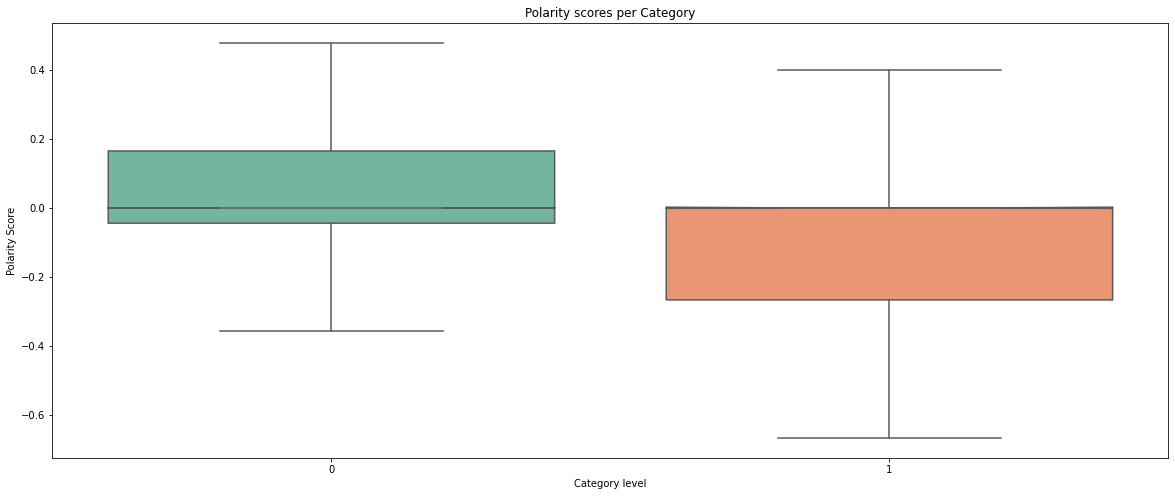

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='category', y='polarity', notch=True, data= lem_cleaned_df, showfliers=False, palette="Set2")
# Name axis labels
plt.xlabel("Category level")
plt.ylabel("Polarity Score")
# Add title
plt.title('Polarity scores per Category')

* For the category of `Non-hateful` comments, the average polarity score is around a neutral status while the comments hold quite different scores (concentrated mostly in positive values). At same time, as it appears, the `Non-hateful` texts, correspond to higher polarity scores than the `Hateful` ones.
* The medians are on the same level among the 2 categories, however the distributions are different.
* For the category of `Hateful` comments, we can understand that the data are negative skewed, indicating that most hateful comments have high negative meaning, being apart from the average comments. 

* Since all the former have been displayed, it would be useful to test the readability statuses of the comments before any further alterations

## Check readability
 Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document.

In [ ]:
#Install & import library
!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Creating variables corresponding to 3 kinds of readability scores
lem_cleaned_df['dale_chall_score']=lem_cleaned_df['lemmatized'].apply(lambda x: textstat.dale_chall_readability_score(x))
lem_cleaned_df['flesh_reading_ease']=lem_cleaned_df['lemmatized'].apply(lambda x: textstat.flesch_reading_ease(x))
lem_cleaned_df['gunning_fog']=lem_cleaned_df['lemmatized'].apply(lambda x: textstat.gunning_fog(x))

In [ ]:
print('Dale Chall Score of comments=>',lem_cleaned_df['dale_chall_score'].mean())

print('Flesch Reading Score of comments=>',lem_cleaned_df['flesh_reading_ease'].mean())

print('Gunning Fog Index of comments=>',lem_cleaned_df['gunning_fog'].mean())

Dale Chall Score of comments=> 12.156716025326991
Flesch Reading Score of comments=> 36.99411011394944
Gunning Fog Index of comments=> 15.96875514159088


In [ ]:
lem_cleaned_df.head(20)

,category,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog
0,0,yes sort remind eld lady play movie titanic te...,0.800000,6.34,71.14,9.15
1,0,lady buy gun learn use effectively kill mother...,0.600000,8.87,61.33,8.00
2,0,amazing dad not forget girl crushs girl mom as...,0.257143,9.03,82.99,8.80
3,0,delon love turkey brave turk indian muslim sha...,0.650000,12.03,61.33,4.00
4,0,here thing person earth decide s not matter fe...,0.433333,7.07,77.57,7.60
5,0,hey college transiconnotch suspend decide come...,-0.057143,12.23,31.89,14.17
6,0,child respect school single child black asian ...,-0.047619,10.47,40.69,16.07
7,0,think bit confused lgbt ally friend okay s tru...,0.283333,11.29,56.93,14.98
8,0,decision woman not want carry rapist offspring...,0.416667,11.36,68.77,8.04
9,0,oppose restriction human service support eligi...,0.000000,12.95,-0.61,17.92


* `Flesch Reading Ease` : is a score that quantifies the readability of a text. The maximum value that can reach is 121.22, where the lower values do not reach a baseline.

| Score | Difficulty |
| :- | -: |
| 90-100| Very Easy
| 80-89 | Easy 
| 70-79 | Fairly Easy 
| 60-69 | Standard 
| 50-59 | Fairly Difficult 
| 30-49 | Difficult 
| 0-29  | Very Confusing 

* `Dale-Chall` : is a score different from other tests, since it uses a lookup table of the most commonly used 3000 English words. Thus it returns the grade level using the New Dale-Chall Formula.

| Score | Understood by |
| :- | -: |
| 4.9 or lower| average 4th-grade student or lower
| 5.0–5.9 | average 5th or 6th-grade student 
| 6.0–6.9 | average 7th or 8th-grade student
| 7.0–7.9 | average 9th or 10th-grade student  
| 8.0–8.9 | average 11th or 12th-grade student 
| 9.0–9.9 | average 13th to 15th-grade (college) student

* `Gunning FOG Formula` : is a score that returns the FOG index of the given text. This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document.

* Based on the above axplanations it seems that, on average, the comments of the in use dataset can be considered as difficult for a simple person to read and understand, enhancing the idea of applying further cleaning techniques, as well as, limiting our dataset event further to ease the modeling phase.

* The textstat library  provides the text_standard() function, that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely. By this way, we are able to define the comments that increase the difficulty level of the comments.

In [ ]:
lem_cleaned_df['text_standard']=lem_cleaned_df['lemmatized'].apply(lambda x: textstat.text_standard(x))
lem_cleaned_df['text_standard2']=lem_cleaned_df['lemmatized'].apply(lambda x: textstat.text_standard(x, float_output=True))
print('Text Standard of  comments=>',lem_cleaned_df['text_standard'].mode())
print('Text Standard of  comments=>',lem_cleaned_df['text_standard2'].mode())

Text Standard of  comments=> 0    12th and 13th grade
dtype: object
Text Standard of  comments=> 0    13.0
dtype: float64


In [ ]:
lem_cleaned_df.head(10)

,category,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,0.800000,6.34,71.14,9.15,8th and 9th grade,9.0
1,0,lady buy gun learn use effectively kill mother...,0.600000,8.87,61.33,8.00,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,0.257143,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,0.650000,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide s not matter fe...,0.433333,7.07,77.57,7.60,7th and 8th grade,8.0
5,0,hey college transiconnotch suspend decide come...,-0.057143,12.23,31.89,14.17,11th and 12th grade,12.0
6,0,child respect school single child black asian ...,-0.047619,10.47,40.69,16.07,16th and 17th grade,17.0
7,0,think bit confused lgbt ally friend okay s tru...,0.283333,11.29,56.93,14.98,10th and 11th grade,11.0
8,0,decision woman not want carry rapist offspring...,0.416667,11.36,68.77,8.04,8th and 9th grade,9.0
9,0,oppose restriction human service support eligi...,0.000000,12.95,-0.61,17.92,18th and 19th grade,19.0


In [ ]:
print (lem_cleaned_df['text_standard'].unique())

['8th and 9th grade' '7th and 8th grade' '6th and 7th grade'
 '11th and 12th grade' '16th and 17th grade' '10th and 11th grade'
 '18th and 19th grade' '0th and 1st grade' '9th and 10th grade'
 '22nd and 23rd grade' '-1th and 0th grade' '13th and 14th grade'
 '2nd and 3rd grade' '3rd and 4th grade' '12th and 13th grade'
 '21st and 22nd grade' '1st and 2nd grade' '15th and 16th grade'
 '31st and 32nd grade' '14th and 15th grade' '5th and 6th grade'
 '4th and 5th grade' '17th and 18th grade' '23rd and 24th grade'
 '19th and 20th grade' '24th and 25th grade' '20th and 21st grade'
 '-4th and -3th grade' '25th and 26th grade' '26th and 27th grade'
 '27th and 28th grade' '-3th and -2th grade' '-5th and -4th grade'
 '29th and 30th grade' '99th and 100th grade' '39th and 40th grade'
 '43rd and 44th grade' '28th and 29th grade' '30th and 31st grade'
 '34th and 35th grade' '32nd and 33rd grade' '37th and 38th grade'
 '35th and 36th grade' '38th and 39th grade' '48th and 49th grade'
 '41st and 42n

In [ ]:
print (lem_cleaned_df['text_standard2'].unique())

[ 9.000e+00  8.000e+00  7.000e+00  1.200e+01  1.700e+01  1.100e+01
  1.900e+01  1.000e+00  1.000e+01  2.300e+01  0.000e+00  1.400e+01
  3.000e+00  4.000e+00  1.300e+01  2.200e+01  2.000e+00  1.600e+01
  3.200e+01  1.500e+01  6.000e+00  5.000e+00  1.800e+01  2.400e+01
  2.000e+01  2.500e+01  2.100e+01 -3.000e+00  2.600e+01  2.700e+01
  2.800e+01 -2.000e+00 -4.000e+00  3.000e+01  1.000e+02  4.000e+01
  4.400e+01  2.900e+01  3.100e+01  3.500e+01  3.300e+01  3.800e+01
  3.600e+01  3.900e+01  4.900e+01  4.200e+01  3.400e+01  6.000e+01
  4.500e+01  3.700e+01  5.000e+01  8.800e+01  4.800e+01  4.600e+01
  6.400e+01  4.700e+01  5.200e+01  4.100e+01  6.800e+01  9.600e+01
  5.300e+01  4.300e+01  1.090e+02  8.700e+01  5.700e+01  1.010e+02
  6.600e+01  1.400e+02  1.180e+02  5.600e+01  1.740e+02  6.200e+01
  6.500e+01  1.130e+02  7.900e+01  1.380e+02  1.500e+02  5.800e+01
  1.230e+02  1.020e+02  8.300e+01  6.300e+01  1.200e+02  5.100e+01
  9.900e+01  1.750e+02  7.600e+01  5.500e+01  1.590e+02  1.280

In [ ]:
# Calculating the amount of comments that considered as difficult to understand
diffcom3 = lem_cleaned_df[lem_cleaned_df['text_standard']=='13th and 14th grade']
diffcom3

,category,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
20,0,jimmy positive role model jews not allow pathe...,-0.386364,15.19,19.03,16.00,13th and 14th grade,14.0
36,0,night coinsquare attend career event great tim...,0.433333,11.73,34.26,16.00,13th and 14th grade,14.0
49,1,suddenly feel lot well bus orphan torch rememb...,0.000000,10.98,37.30,13.86,13th and 14th grade,14.0
53,0,plenty church will not condemn man church marr...,0.125000,9.37,34.26,14.00,13th and 14th grade,14.0
79,0,marielle franco bisexual human right defender ...,0.151190,14.55,26.81,16.02,13th and 14th grade,14.0
...,...,...,...,...,...,...,...,...
2212935,1,mentally disabled people incabable education a...,-0.200000,13.01,5.15,14.23,13th and 14th grade,14.0
2212963,1,lesbian deserve discriminate not want d well h...,0.000000,11.93,-4.33,13.20,13th and 14th grade,14.0
2213091,1,mentally disabled folk criminal,-0.300000,19.62,8.20,21.60,13th and 14th grade,14.0
2213190,1,black americans corrosive influence country in...,-0.691667,14.00,24.44,20.58,13th and 14th grade,14.0


In [ ]:
# Calculating the amount of comments that considered as difficult to understand
diffcom4 = lem_cleaned_df[lem_cleaned_df['text_standard']=='14th and 15th grade']
diffcom4

,category,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
58,0,thank take time spend day discuss way promote ...,-0.125000,12.06,26.81,16.02,14th and 15th grade,15.0
90,0,smt sheila dikshit remarkable leader dedicate ...,0.541667,14.55,26.81,18.13,14th and 15th grade,15.0
113,0,mr paal bjornestad deputy head mission embassy...,0.200000,15.08,14.29,14.42,14th and 15th grade,15.0
129,0,love trans inclusion,0.500000,14.31,59.97,14.53,14th and 15th grade,15.0
152,0,grandfather wwii veteran fond say find river n...,0.000000,11.19,49.15,14.25,14th and 15th grade,15.0
...,...,...,...,...,...,...,...,...
2213104,1,disabled equivalent gay,0.108333,14.31,34.59,14.53,14th and 15th grade,15.0
2213232,1,woman stop act like rape victim apologist ruse...,-0.037500,14.55,26.81,16.02,14th and 15th grade,15.0
2213272,1,migrant come undermine national identity,0.000000,16.52,-1.29,26.00,14th and 15th grade,15.0
2213286,1,muslims welcome country contribute society,0.800000,13.36,-1.29,18.00,14th and 15th grade,15.0


In [ ]:
# Calculating the amount of comments that considered as difficult to understand
diffcom5 = lem_cleaned_df[lem_cleaned_df['text_standard']=='22nd and 23rd grade']
diffcom5

,category,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
14,0,andy artin believe lord want carry bible car y...,-0.083333,12.22,46.78,18.35,22nd and 23rd grade,23.0
144,0,disgusting behaviour coward attack gay girl bu...,-0.291667,15.06,-6.02,22.76,22nd and 23rd grade,23.0
387,0,multiculturalism gift burden embrace reject cu...,0.000000,18.34,-48.66,20.00,22nd and 23rd grade,23.0
437,0,hope woman middle east empower video energy fe...,0.666667,11.61,16.66,17.12,22nd and 23rd grade,23.0
565,0,entry long line dog whistle permutation design...,-0.083333,13.24,16.66,22.63,22nd and 23rd grade,23.0
...,...,...,...,...,...,...,...,...
2210838,1,islam incompatible european convention human r...,0.095238,17.09,-27.68,22.40,22nd and 23rd grade,23.0
2211508,1,islam degenerate dangerous ideology call terro...,-0.600000,14.46,-36.14,22.40,22nd and 23rd grade,23.0
2212544,1,islam ideology conquest violence cause terrori...,0.000000,17.52,-54.08,25.66,22nd and 23rd grade,23.0
2212549,1,islam political ideology promote violent extre...,-0.400000,19.72,-53.06,29.07,22nd and 23rd grade,23.0


In [ ]:
# Calculating the amount of comments that considered as difficult to understand
diffcom6 = lem_cleaned_df[lem_cleaned_df['text_standard']=='100th and 101st grade']
diffcom6

,category,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
7236,0,ahh hello witzeman symbol m m character greek ...,0.129856,21.63,-193.11,103.17,100th and 101st grade,101.0
11040,0,disruptive activity stop disruptive editing co...,0.048175,22.15,-193.11,103.83,100th and 101st grade,101.0
13771,0,reply talk note restore revision talk rocker h...,0.037578,22.27,-193.11,103.01,100th and 101st grade,101.0
24522,0,head common usage understanding word mean stat...,0.003041,22.41,-213.76,100.02,100th and 101st grade,101.0
25791,0,promise brief discussion different type distil...,0.024295,20.02,-225.60,98.36,100th and 101st grade,101.0
33339,1,hi interested discussion thank spanish heraldr...,-0.174901,22.80,-198.53,102.38,100th and 101st grade,101.0
34674,0,article sizzla use babylon set system design b...,0.017826,23.06,-198.53,103.37,100th and 101st grade,101.0
37417,0,encourage read essay carefully wp great resour...,0.183547,21.23,-201.91,100.84,100th and 101st grade,101.0
39226,0,attention ip address register america online a...,0.078992,18.97,-193.11,100.71,100th and 101st grade,101.0
48236,0,romanization modify hepburn romanization descr...,0.043324,21.65,-208.34,100.78,100th and 101st grade,101.0


In [ ]:
# Finding the corresponding scores/ labels based on the new variables
print('Text Standard of available comments=>',(lem_cleaned_df['text_standard']).mode())
print('Text Standard of available comments=>',(lem_cleaned_df['text_standard']).min())
print('Text Standard of available comments=>',(lem_cleaned_df['text_standard']).max())

print('Text Standard of available comments=>',(lem_cleaned_df['text_standard2']).mode())
print('Text Standard of available comments=>',(lem_cleaned_df['text_standard2']).mean())
print('Text Standard of available comments=>',(lem_cleaned_df['text_standard2']).min())
print('Text Standard of available comments=>',(lem_cleaned_df['text_standard2']).max())

Text Standard of available comments=> 0    12th and 13th grade
dtype: object
Text Standard of available comments=> -1th and 0th grade
Text Standard of available comments=> 9th and 10th grade
Text Standard of available comments=> 0    13.0
dtype: float64
Text Standard of available comments=> 13.49668812449181
Text Standard of available comments=> -4.0
Text Standard of available comments=> 3201.0


* We decided to drop comments with high level of difficulty, after examining the kind of information that we are going to exclude. Then proceed with further cleaning techniques.

For continuety & technical matters the dataset was downloaded and re- uploaded, without the variables created above

## Extra cleaning & limitation

* Re-uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_cleaned_df2.zip to final_cleaned_df2.zip


In [ ]:
!unzip "final_cleaned_df2.zip"

Archive:  final_cleaned_df2.zip
  inflating: final_cleaned_df.csv    


In [ ]:
# Load csv file
lem_cleaned_df_new = pd.read_csv('final_cleaned_df.csv')
# viewing an excerpt of the data
lem_cleaned_df_new.head()

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide s not matter fe...


In [ ]:
#Excluding words based on the WordCloud graphs
lem_cleaned_df_new['lemmatized']=lem_cleaned_df_new['lemmatized'].str.replace('url',"")

In [ ]:
#Creating function applying extra cleaning
#Remove single letters
def single_letter(comment):
    return re.sub(r'(?:^| )\w(?:$| )', ' ', comment).strip()

In [ ]:
#Applying the above function
lem_cleaned_df_new['lemmatized']= lem_cleaned_df_new['lemmatized'].apply(single_letter)
lem_cleaned_df_new.head(10)

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide not matter feel...
5,0,hey college transiconnotch suspend decide come...
6,0,child respect school single child black asian ...
7,0,think bit confused lgbt ally friend okay true ...
8,0,decision woman not want carry rapist offspring...
9,0,oppose restriction human service support eligi...


In [ ]:
#Creating function for extra cleaning
#Remove multiple characters in the same word
def repetition(text):
    return re.sub("(.)\\1{3,}", "\\1", text)

In [ ]:
#Applying the above function
lem_cleaned_df_new['lemmatized']= lem_cleaned_df_new['lemmatized'].apply(repetition)
lem_cleaned_df_new.head(10)

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide not matter feel...
5,0,hey college transiconnotch suspend decide come...
6,0,child respect school single child black asian ...
7,0,think bit confused lgbt ally friend okay true ...
8,0,decision woman not want carry rapist offspring...
9,0,oppose restriction human service support eligi...


In [ ]:
#Creating function for extra cleaning
#Remove duplicated words in a row
def repetition_word(text):
  return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

In [ ]:
#Applying the above function
lem_cleaned_df_new['lemmatized']= lem_cleaned_df_new['lemmatized'].apply(repetition_word)
lem_cleaned_df_new.head(10)

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide not matter feel...
5,0,hey college transiconnotch suspend decide come...
6,0,child respect school single child black asian ...
7,0,think bit confused lgbt ally friend okay true ...
8,0,decision woman not want carry rapist offspring...
9,0,oppose restriction human service support eligi...


In [ ]:
#Re-creating the above readability scores
lem_cleaned_df_new['dale_chall_score']=lem_cleaned_df_new['lemmatized'].apply(lambda x: textstat.dale_chall_readability_score(x))
lem_cleaned_df_new['flesh_reading_ease']=lem_cleaned_df_new['lemmatized'].apply(lambda x: textstat.flesch_reading_ease(x))
lem_cleaned_df_new['gunning_fog']=lem_cleaned_df_new['lemmatized'].apply(lambda x: textstat.gunning_fog(x))

In [ ]:
lem_cleaned_df_new['text_standard']=lem_cleaned_df_new['lemmatized'].apply(lambda x: textstat.text_standard(x))
lem_cleaned_df_new['text_standard2']=lem_cleaned_df_new['lemmatized'].apply(lambda x: textstat.text_standard(x, float_output=True))

In [ ]:
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


* Excluding comments with high readability issues

In [ ]:
# The float format of the text_standard function, was used to exlude comments
lem_cleaned_df_new.drop(lem_cleaned_df_new[lem_cleaned_df_new['text_standard2'] < 0].index, inplace = True)
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
lem_cleaned_df_new.drop(lem_cleaned_df_new[lem_cleaned_df_new['text_standard2'] >=100].index, inplace = True)
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Printing information with readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=30) & (lem_cleaned_df_new['category']==1) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
2941,1,reason indians bash muslims islam hindu suprem...,13.94,-33.76,38.48,39th and 40th grade,40.0
3174,1,stop illegal immigration year ago turn beloved...,16.48,-79.10,54.35,52nd and 53rd grade,53.0
3927,1,aj bullshit not talk law freedom care free cla...,10.47,10.24,23.11,30th and 31st grade,31.0
3946,1,piece heaping pile bullshit live street away a...,11.88,19.04,26.67,33rd and 34th grade,34.0
3949,1,depend jihadist islam fair comparison people s...,13.74,-14.48,31.91,31st and 32nd grade,32.0
...,...,...,...,...,...,...,...
803075,1,look like political rally chris lee maybe want...,13.24,-7.03,31.66,31st and 32nd grade,32.0
2166676,1,projectdrugs&bitche,35.27,-132.59,40.40,31st and 32nd grade,32.0
2167519,1,foxtrotuniformcharliekilo,19.48,-555.59,40.40,90th and 91st grade,91.0
2174779,1,multiculturalism political degeneration harm i...,17.09,-112.28,29.07,29th and 30th grade,30.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=30) & (lem_cleaned_df_new['category']==0) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
44,0,feminist spirituality aim revitalize relationa...,16.07,-92.99,31.47,31st and 32nd grade,32.0
565,0,come point entry apply asylum work visa etc co...,13.39,30.54,24.91,31st and 32nd grade,32.0
2383,0,international day homophobia transphobia bipho...,16.71,-42.91,29.35,29th and 30th grade,30.0
3529,0,war discrimination military necessitywhen kore...,15.55,-72.00,43.80,43rd and 44th grade,44.0
6260,0,lie ballot bill clinton decimate youth program...,14.97,-52.70,49.11,48th and 49th grade,49.0
...,...,...,...,...,...,...,...
2157601,0,unexplainable,19.48,-132.59,40.40,31st and 32nd grade,32.0
2168054,0,coinckydink,19.48,-132.59,40.40,31st and 32nd grade,32.0
2168857,0,browaskenbecausessidehebelihoeve,19.48,-555.59,40.40,90th and 91st grade,91.0
2169460,0,demandeveryonesmoney & objectscollectively ber...,19.58,-363.04,41.20,64th and 65th grade,65.0


In [ ]:
#Printing the distribution of "Hateful" category
lem_cleaned_df_new.loc[lem_cleaned_df_new['category']==1]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
33,1,whore need pound,9.05,119.19,1.20,1st and 2nd grade,2.0
49,1,suddenly feel lot well bus orphan torch rememb...,10.98,37.30,13.86,13th and 14th grade,14.0
79,1,abortion take life selfish reason bullshit pun...,14.10,42.72,10.00,14th and 15th grade,15.0
80,1,awakenchosen nd amendment jamal primate get ca...,15.67,51.85,8.04,8th and 9th grade,9.0
81,1,iran kill american trash,11.73,75.88,1.60,1st and 2nd grade,2.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Calculating the corresponding percentage to decide how to proceed
(len(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=30) & (lem_cleaned_df_new['category']==1) ])/ len(lem_cleaned_df_new.loc[lem_cleaned_df_new['category']==1]))*100

1.7573806106218721

In [ ]:
lem_cleaned_df_new.drop(lem_cleaned_df_new[lem_cleaned_df_new['text_standard2'] >=30].index, inplace = True)
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=25) & (lem_cleaned_df_new['category']==0) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
104,0,view salvation bible contrary hello johnnyboym...,11.07,24.79,22.75,28th and 29th grade,29.0
134,0,true freedom absolutely speak woman early twen...,10.58,4.82,22.87,24th and 25th grade,25.0
297,0,white weird category real thing not white cult...,12.14,10.57,19.71,24th and 25th grade,25.0
401,0,masculine awaken spiritual elevation blessing,13.36,-52.05,26.00,25th and 26th grade,26.0
511,0,people include half damn country figure own ra...,12.10,-9.06,27.10,25th and 26th grade,26.0
...,...,...,...,...,...,...,...
2151993,0,ruinacomedian charlie lapdance,19.58,-75.40,14.53,24th and 25th grade,25.0
2152024,0,wearerepublicnotregime potus bo violate usa so...,19.87,-89.95,21.38,27th and 28th grade,28.0
2155722,0,stockboyeveryone mock,19.53,-6.70,20.80,26th and 27th grade,27.0
2160607,0,jam skid rowkixcinderelladamn yankeesbon jovid...,18.12,-64.57,21.38,24th and 25th grade,25.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=25) & (lem_cleaned_df_new['category']==1) ]

In [ ]:
#Calculating the corresponding percentage to decide how to proceed
(len(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=25) & (lem_cleaned_df_new['category']==1) ])/ len(lem_cleaned_df_new.loc[lem_cleaned_df_new['category']==1]))*100

1.2695466750908229

In [ ]:
lem_cleaned_df_new.drop(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=25) & (lem_cleaned_df_new['category']==0) ].index, inplace = True)
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=21) & (lem_cleaned_df_new['category']==0) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
14,0,andy artin believe lord want carry bible car y...,12.22,46.78,18.35,22nd and 23rd grade,23.0
16,0,yta big time mother mexican bear chihuahua mex...,8.98,10.57,18.57,20th and 21st grade,21.0
30,0,man latino marry pakistani think wide cultural...,10.69,9.56,21.07,20th and 21st grade,21.0
99,0,say relate important way wellmeane white peopl...,13.32,-7.37,26.62,22nd and 23rd grade,23.0
113,0,offend repeatedly tell advocate death murder h...,13.09,3.80,21.20,20th and 21st grade,21.0
...,...,...,...,...,...,...,...
2168663,0,learn japanese political plot assassinate char...,17.85,-38.17,23.20,20th and 21st grade,21.0
2170080,0,birdit planeit supermanu nbasuperheroe,19.62,8.20,21.60,21st and 22nd grade,22.0
2171193,0,surrender divinity conqueror apocalypse gtorie...,13.90,-12.79,23.20,23rd and 24th grade,24.0
2171276,0,terrifying leprechaun,19.53,-49.00,20.80,20th and 21st grade,21.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=21) & (lem_cleaned_df_new['category']==1) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
609,1,bring motherfucker jewbag bring ya shalom bost...,16.04,25.80,22.44,20th and 21st grade,21.0
803,1,call retard not come insult like bear mom ass ...,11.06,21.40,21.28,20th and 21st grade,21.0
1086,1,urge brave sikh muslim christian dalit soldier...,13.70,-11.10,19.63,20th and 21st grade,21.0
1122,1,start charge country daily fee theirs illegall...,12.22,4.48,26.16,22nd and 23rd grade,23.0
1693,1,buy acosta ferengi act rat face tool isisisrae...,14.37,15.31,25.61,22nd and 23rd grade,23.0
...,...,...,...,...,...,...,...
2177945,1,muslim terrorist incompatible western society,16.52,-52.05,26.00,25th and 26th grade,26.0
2178023,1,homosexual want change conversion therapy cons...,11.10,11.58,21.38,20th and 21st grade,21.0
2178028,1,homosexuality nature,19.53,-175.90,20.80,24th and 25th grade,25.0
2178046,1,islam totalitarian ideology ban,19.62,-76.41,21.60,24th and 25th grade,25.0


In [ ]:
#Calculating the corresponding percentage to decide how to proceed
(len(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=21) & (lem_cleaned_df_new['category']==1) ])/ len(lem_cleaned_df_new.loc[lem_cleaned_df_new['category']==1]))*100

3.5638129837308483

In [ ]:
lem_cleaned_df_new.drop(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=21) & (lem_cleaned_df_new['category']==0) ].index, inplace = True)
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=15) & (lem_cleaned_df_new['category']==0) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
6,0,child respect school single child black asian ...,10.47,40.69,16.07,16th and 17th grade,17.0
9,0,oppose restriction human service support eligi...,12.89,-7.04,18.13,18th and 19th grade,19.0
15,0,gratifying factual word minority woman lead de...,14.61,-22.27,25.82,18th and 19th grade,19.0
26,0,read ask prove gender sexuality valid regardle...,15.21,-0.95,23.66,16th and 17th grade,17.0
28,0,indiawithdhoni patriot indian tolerate insult ...,15.06,-6.02,18.31,18th and 19th grade,19.0
...,...,...,...,...,...,...,...
2173746,0,hillbilly bonebobonebobone bone,14.31,59.97,14.53,14th and 15th grade,15.0
2173937,0,jig levitate lousiville,14.31,59.97,14.53,14th and 15th grade,15.0
2174019,0,mall fellow ginzo christmas shopping fuckdimmy...,13.90,-4.33,18.20,15th and 16th grade,16.0
2174022,0,march mad marchmadness collegehoop indiana iub...,15.26,38.99,19.94,14th and 15th grade,15.0


In [ ]:
#Printing information with the readability issues
lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=15) & (lem_cleaned_df_new['category']==1) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
79,1,abortion take life selfish reason bullshit pun...,14.10,42.72,10.00,14th and 15th grade,15.0
146,1,thing americans embarrassed rest world see pat...,11.41,38.66,16.27,16th and 17th grade,17.0
275,1,virginiabeachstrong cowardly closet hate white...,9.92,9.55,18.95,14th and 15th grade,15.0
347,1,thing alinity go human sexuality not moderatel...,11.82,46.10,16.40,16th and 17th grade,17.0
381,1,stop classify transgend people have mental dis...,15.74,17.68,18.34,17th and 18th grade,18.0
...,...,...,...,...,...,...,...
2178047,1,muslims welcome country contribute society,13.36,-1.29,18.00,14th and 15th grade,15.0
2178051,1,nigga inferior,19.53,-49.00,20.80,20th and 21st grade,21.0
2178053,1,niggasare inferior enslave,19.58,-24.64,14.53,17th and 18th grade,18.0
2178064,1,woman useful housekeeper,9.05,9.21,14.53,14th and 15th grade,15.0


In [ ]:
#Calculating the corresponding percentage to decide how to proceed
(len(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=15) & (lem_cleaned_df_new['category']==1) ])/ len(lem_cleaned_df_new.loc[lem_cleaned_df_new['category']==1]))*100

12.191991786447637

In [ ]:
lem_cleaned_df_new.drop(lem_cleaned_df_new.loc[(lem_cleaned_df_new['text_standard2']>=15) & (lem_cleaned_df_new['category']==0) ].index, inplace = True)
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Hateful category Distribution
lem_cleaned_df_new.loc[(lem_cleaned_df_new['category']==1) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
33,1,whore need pound,9.05,119.19,1.20,1st and 2nd grade,2.0
49,1,suddenly feel lot well bus orphan torch rememb...,10.98,37.30,13.86,13th and 14th grade,14.0
79,1,abortion take life selfish reason bullshit pun...,14.10,42.72,10.00,14th and 15th grade,15.0
80,1,awakenchosen nd amendment jamal primate get ca...,15.67,51.85,8.04,8th and 9th grade,9.0
81,1,iran kill american trash,11.73,75.88,1.60,1st and 2nd grade,2.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Non hateful category Distribution
lem_cleaned_df_new.loc[(lem_cleaned_df_new['category']==0) ]

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2174525,0,yaya ho cute avi tho idea sleep,10.75,115.13,2.80,2nd and 3rd grade,3.0
2174526,0,yea new friend kno allow cute darkie friend s lol,12.03,95.17,4.00,3rd and 4th grade,4.0
2174553,0,know early bird get worm put gummy worm mornin...,5.71,78.25,4.00,4th and 5th grade,5.0
2174564,0,ve go break wrong heart baby drive redneck crazy,9.35,96.18,3.60,3rd and 4th grade,4.0


* Identifying any re-appearance of missing values & dublicated ones after the appliance of the aforementioned functions

In [ ]:
lem_cleaned_df_new.isnull().sum()

category              0
lemmatized            0
dale_chall_score      0
flesh_reading_ease    0
gunning_fog           0
text_standard         0
text_standard2        0
dtype: int64

In [ ]:
#Check for duplicates
lem_cleaned_df_new['lemmatized'].duplicated(keep=False).sum()

2800

In [ ]:
# Dropping duplicate values
lem_cleaned_df_new.drop_duplicates(subset ="lemmatized",
                     keep = False, inplace = True)

In [ ]:
#Ensuring no duplicates
lem_cleaned_df_new['lemmatized'].duplicated(keep=False).sum()

0

In [ ]:
#Check for duplicates
lem_cleaned_df_new.duplicated(keep=False).sum()

0

In [ ]:
lem_cleaned_df_new

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


* Printing the amount of comments in each category

In [ ]:
print(lem_cleaned_df_new.loc[(lem_cleaned_df_new['category']==0) ])
print(lem_cleaned_df_new.loc[(lem_cleaned_df_new['category']==1) ])

         category                                         lemmatized  \
0               0  yes sort remind eld lady play movie titanic te...   
1               0  lady buy gun learn use effectively kill mother...   
2               0  amazing dad not forget girl crushs girl mom as...   
3               0  delon love turkey brave turk indian muslim sha...   
4               0  here thing person earth decide not matter feel...   
...           ...                                                ...   
2174525         0                    yaya ho cute avi tho idea sleep   
2174526         0  yea new friend kno allow cute darkie friend s lol   
2174553         0  know early bird get worm put gummy worm mornin...   
2174564         0   ve go break wrong heart baby drive redneck crazy   
2174567         0  ruffle ntac eileen dahlia beautiful color comb...   

         dale_chall_score  flesh_reading_ease  gunning_fog      text_standard  \
0                    6.40               72.16         

* Printing a random sample of the dataset

In [ ]:
lem_cleaned_df_new.sample(20)

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
239240,0,check research rethink private school schtick ...,13.34,49.15,12.44,12th and 13th grade,13.0
2020766,0,doctor demento go come,7.78,50.50,11.60,7th and 8th grade,8.0
843071,0,instant guilty plea shyster need,13.36,83.32,2.00,1st and 2nd grade,2.0
2075475,0,read breitbart learn,9.05,59.97,14.53,9th and 10th grade,10.0
376484,0,actually experience far parent ve work know ma...,9.50,50.84,11.47,9th and 10th grade,10.0
2166620,1,ford fancy fag mobile,15.68,75.88,1.60,1st and 2nd grade,2.0
665600,0,government construct rental unit see unit buil...,11.34,55.24,8.90,8th and 9th grade,9.0
1993373,0,wave sign home hit bong,7.04,117.16,2.00,1st and 2nd grade,2.0
981052,0,mail equal voter fraud polling station valid v...,10.45,86.71,4.00,3rd and 4th grade,4.0
280391,0,umm read comment come review screen consistent...,11.75,47.79,11.33,11th and 12th grade,12.0


In [ ]:
lem_cleaned_df_new.sample(20)

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
816594,0,know celibacy root cause pedophilia right,9.20,73.85,9.07,9th and 10th grade,10.0
732720,0,convict attempt sexual abuse minor quit read m...,14.61,53.88,8.04,7th and 8th grade,8.0
1009311,0,ve see toxic political condition usa today sid...,12.80,30.87,11.33,12th and 13th grade,13.0
352949,0,yep think caldwell pay rail start figure ala m...,9.94,67.08,10.30,9th and 10th grade,10.0
1945703,0,jesus not popular ve new writing gospel real g...,14.22,11.25,26.67,-1th and 0th grade,0.0
1734242,0,snack food subject hst subject excise tax mone...,11.91,54.22,13.86,11th and 12th grade,12.0
2153064,1,mad hoe tl tht shit illegaltbh,14.46,90.77,9.07,2nd and 3rd grade,3.0
434996,0,reality check mean american consumer price wal...,9.50,50.84,8.13,9th and 10th grade,10.0
331451,0,tweetertantrum call potus laugh republicans fl...,12.79,51.85,11.67,8th and 9th grade,9.0
1261709,0,kid learn mother grandmother point less ex&le ...,10.45,69.79,4.00,5th and 6th grade,6.0


* Applying the last cleaning methods before finalizing the dataset for the modeling phase

In [ ]:
lem_cleaned_df_new2=lem_cleaned_df_new.copy()
lem_cleaned_df_new2

,category,lemmatized,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,text_standard2
0,0,yes sort remind eld lady play movie titanic te...,6.40,72.16,8.90,7th and 8th grade,8.0
1,0,lady buy gun learn use effectively kill mother...,7.59,53.88,8.04,7th and 8th grade,8.0
2,0,amazing dad not forget girl crushs girl mom as...,9.03,82.99,8.80,8th and 9th grade,9.0
3,0,delon love turkey brave turk indian muslim sha...,12.03,61.33,4.00,6th and 7th grade,7.0
4,0,here thing person earth decide not matter feel...,6.28,78.59,7.20,6th and 7th grade,7.0
...,...,...,...,...,...,...,...
2178066,1,know woman single,0.15,59.97,1.20,0th and 1st grade,1.0
2178067,1,woman want mother say want patriarchal society,8.50,30.53,14.23,8th and 9th grade,9.0
2178068,1,woman submissive man,9.05,34.59,14.53,8th and 9th grade,9.0
2178069,1,woman essentially childlike unable understand ...,13.01,-20.24,14.23,17th and 18th grade,18.0


In [ ]:
#Cleaning methods re-applied
lem_cleaned_df_new2['lemmatized']= lem_cleaned_df_new2['lemmatized'].apply(single_letter)
lem_cleaned_df_new2['lemmatized']=lem_cleaned_df_new2['lemmatized'].str.replace('url',"")
lem_cleaned_df_new2['lemmatized']= lem_cleaned_df_new2['lemmatized'].apply(repetition)
lem_cleaned_df_new2['lemmatized']= lem_cleaned_df_new2['lemmatized'].apply(repetition_word)
#Remove possible digits and words containing digits not be detected before
lem_cleaned_df_new2['lemmatized']=lem_cleaned_df_new2['lemmatized'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
#Import library for emoji's
from collections import defaultdict

In [ ]:
#Ensuring if there are any emojis not been detected from the other cleaning techniques
emoji_count = defaultdict(int)
for i in lem_cleaned_df_new2['lemmatized']:
    for emoji in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', i):
        emoji_count[emoji] += 1

print (emoji_count)

defaultdict(<class 'int'>, {})


In [ ]:
#Check for duplicates after cleaning methods
lem_cleaned_df_new2['lemmatized'].duplicated(keep=False).sum()

387

In [ ]:
# Dropping the final duplicate values
lem_cleaned_df_new2.drop_duplicates(subset ="lemmatized",
                     keep = False, inplace = True)

In [ ]:
#Dropping columns that are not needed for the following process
lem_cleaned_df_new3=lem_cleaned_df_new2.drop(['dale_chall_score', 'flesh_reading_ease', 'gunning_fog', 'text_standard','text_standard2'], axis=1)
lem_cleaned_df_new3

,category,lemmatized
0,0,yes sort remind eld lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...
3,0,delon love turkey brave turk indian muslim sha...
4,0,here thing person earth decide not matter feel...
...,...,...
2178066,1,know woman single
2178067,1,woman want mother say want patriarchal society
2178068,1,woman submissive man
2178069,1,woman essentially childlike unable understand ...


The final dataset `more_cleaned_df.csv` will be analyzed in the next notebooks  `3. CNN RNN Models`, `4.1. Text Analysis for ML Models`, `4.2. BERT Model` & `4.3. Sentiment Analysis with VADER`.

In [ ]:
#Downloading & Saving final dataset
lem_cleaned_df_new3.to_csv('more_cleaned_df.csv', index=False, header=True)
files.download('more_cleaned_df.csv')

## Further Analysis of final dataset

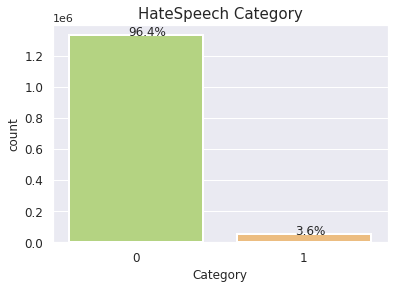

In [ ]:
# Creating in use functions for visualization matters
#without_hue function will plot percentages on the bar graphs. It takes the actual graph and feature as a parameter.
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        #divide the bar height with the total length
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        # for defining the position of displayed values
        x = p.get_x() + p.get_width() / 2 - 0.05
        # for defining the position of displayed values 
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 12)


# Plot display of the imbalance dataset
sns.set_theme(style="darkgrid")
ax=sns.countplot(lem_cleaned_df_new3.category, palette="RdYlGn_r", linewidth=2)
#Name of axis & configuration
plt.xticks(size=12)
plt.xlabel("Category", size =12)
plt.yticks(size  =12 )
plt.ylabel('count',size =12)
#Add title
plt.title("HateSpeech Category", fontsize=15)
#Annotate percentages
without_hue(ax, lem_cleaned_df_new3.category)

* The imbalance is still there but with minor improvements

* Visualizing the final Word Clouds 

In [ ]:
# Creating variables for text graphs to identify words frequence
X_negative3= lem_cleaned_df_new3[lem_cleaned_df_new3['category']==1]
X_positive3= lem_cleaned_df_new3[lem_cleaned_df_new3['category']==0]

(-0.5, 1599.5, 799.5, -0.5)

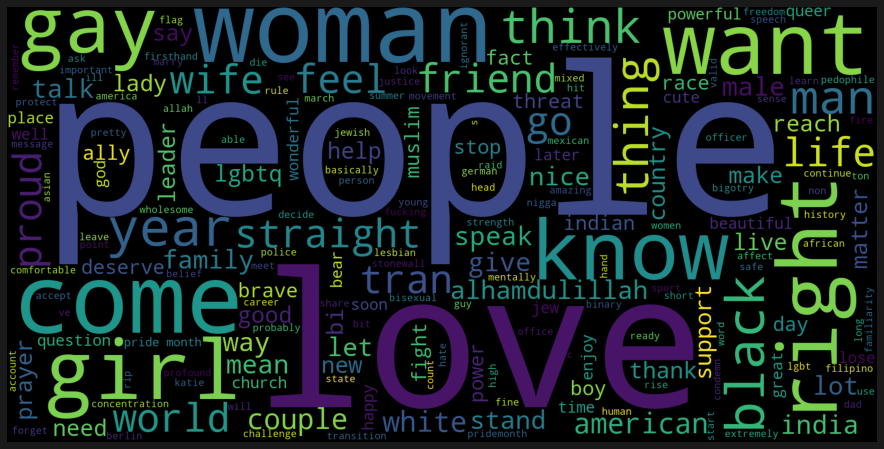

In [ ]:
# Visualizing the positive words from 100 positive comments
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(' '.join(X_positive3['lemmatized'][1:100].tolist()))
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

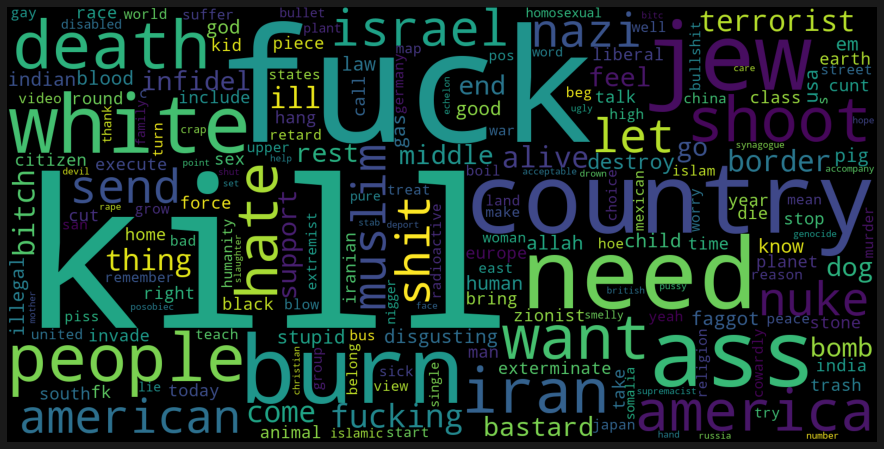

In [ ]:
# Visualizing the negative words from 100 negative comments
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(' '.join(X_negative3['lemmatized'][1:100].tolist()))
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

* Reviewing the final polarity scores to take a glimpse for the rest analysis

In [ ]:
# Creating a polarity score per comment
lem_cleaned_df_new3['polarity']=lem_cleaned_df_new3['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
# Taking a glimpse of the dataset
lem_cleaned_df_new3.head(10)

,category,lemmatized,polarity
0,0,yes sort remind eld lady play movie titanic te...,0.800000
1,0,lady buy gun learn use effectively kill mother...,0.600000
2,0,amazing dad not forget girl crushs girl mom as...,0.257143
3,0,delon love turkey brave turk indian muslim sha...,0.650000
4,0,here thing person earth decide not matter feel...,0.433333
5,0,hey college transiconnotch suspend decide come...,-0.057143
6,0,think bit confused lgbt ally friend okay true ...,0.283333
7,0,decision woman not want carry rapist offspring...,0.416667
8,0,respect tran right good,0.492857
9,0,grateful speak issue women sport important,0.400000


In [ ]:
#Calculating the 3 basic statistical metrics
print ('The max value of polarity of each comment',lem_cleaned_df_new3[['polarity']].max())
print ('The minimum value of polarity of each comment',lem_cleaned_df_new3[['polarity']].min())
print ('The average value of polarity of each comment',lem_cleaned_df_new3[['polarity']].mean())

The max value of polarity of each comment polarity    1.0
dtype: float64
The minimum value of polarity of each comment polarity   -1.0
dtype: float64
The average value of polarity of each comment polarity    0.044734
dtype: float64


* Plotting the final Polarity scores per category

Text(0.5, 1.0, 'Polarity scores per Category')

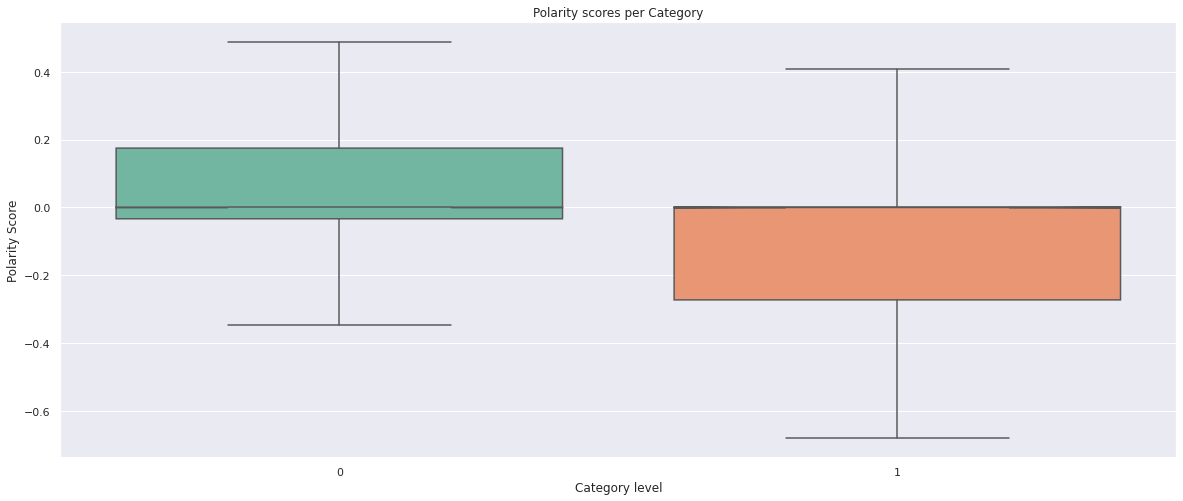

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='category', y='polarity', notch=True, data= lem_cleaned_df_new3, showfliers=False, palette="Set2")
# Name axis labels
plt.xlabel("Category level")
plt.ylabel("Polarity Score")
# Add title
plt.title('Polarity scores per Category')

* Same assumptions as previous

In [ ]:
#Calculating & reviewing the final levels of readability among comments
lem_cleaned_df_new3['text_standard2']=lem_cleaned_df_new3['lemmatized'].apply(lambda x: textstat.text_standard(x, float_output=True))
print('Text Standard of  comments=>',lem_cleaned_df_new3['text_standard2'].mode())

Text Standard of  comments=> 0    13.0
dtype: float64


* The average readability score is the same as before, meaning that the reader which could understand the complexity of comments' syntax & vocabulary, needs to be older than a 9th grader student.

In [ ]:
#Returns the number of sylabbus present in the given text.
lem_cleaned_df_new3['sylabbus']=lem_cleaned_df_new3['lemmatized'].apply(lambda x: textstat.syllable_count(x))

In [ ]:
#Calculates the number of words present in the text. Default value is True, which removes the punctuation before counting lexicon items.
lem_cleaned_df_new3['lexicon']=lem_cleaned_df_new3['lemmatized'].apply(lambda x: textstat.lexicon_count(x))
lem_cleaned_df_new3

,category,lemmatized,polarity,text_standard2,sylabbus,lexicon
0,0,yes sort remind eld lady play movie titanic te...,0.800000,8.0,23,16
1,0,lady buy gun learn use effectively kill mother...,0.600000,8.0,15,9
2,0,amazing dad not forget girl crushs girl mom as...,0.257143,9.0,26,22
3,0,delon love turkey brave turk indian muslim sha...,0.650000,7.0,16,10
4,0,here thing person earth decide not matter feel...,0.433333,7.0,24,18
...,...,...,...,...,...,...
1381257,1,know woman single,-0.071429,1.0,5,3
1381258,1,woman want mother say want patriarchal society,0.000000,9.0,14,7
1381259,1,woman submissive man,0.000000,9.0,6,3
1381260,1,woman essentially childlike unable understand ...,-0.250000,18.0,18,7


In [ ]:
#Returns the number of sentences present in the given text. We expect to all cases, 1 to be the displayed value
lem_cleaned_df_new3['sentence']=lem_cleaned_df_new3['lemmatized'].apply(lambda x: textstat.sentence_count(x))
lem_cleaned_df_new3

,category,lemmatized,polarity,text_standard2,sylabbus,lexicon,sentence
0,0,yes sort remind eld lady play movie titanic te...,0.800000,8.0,23,16,1
1,0,lady buy gun learn use effectively kill mother...,0.600000,8.0,15,9,1
2,0,amazing dad not forget girl crushs girl mom as...,0.257143,9.0,26,22,1
3,0,delon love turkey brave turk indian muslim sha...,0.650000,7.0,16,10,1
4,0,here thing person earth decide not matter feel...,0.433333,7.0,24,18,1
...,...,...,...,...,...,...,...
1381257,1,know woman single,-0.071429,1.0,5,3,1
1381258,1,woman want mother say want patriarchal society,0.000000,9.0,14,7,1
1381259,1,woman submissive man,0.000000,9.0,6,3,1
1381260,1,woman essentially childlike unable understand ...,-0.250000,18.0,18,7,1


In [ ]:
#Defining functions to measure alphabets & words length 

def get_length_alphabets(text):
    text = str(text)
    return len(text)


def get_length_words(text):
    text = str(text)
    return len(text.split(' '))

In [ ]:
#Creating corresponding variables
lem_cleaned_df_new3['length_alphabets'] = lem_cleaned_df_new3['lemmatized'].apply(lambda x: get_length_alphabets(x))
lem_cleaned_df_new3['length_words'] = lem_cleaned_df_new3['lemmatized'].apply(lambda x: get_length_words(x))
lem_cleaned_df_new3.head()

,category,lemmatized,polarity,text_standard2,sylabbus,lexicon,sentence,length_alphabets,length_words
0,0,yes sort remind eld lady play movie titanic te...,0.800000,8.0,23,16,1,87,16
1,0,lady buy gun learn use effectively kill mother...,0.600000,8.0,15,9,1,53,9
2,0,amazing dad not forget girl crushs girl mom as...,0.257143,9.0,26,22,1,131,22
3,0,delon love turkey brave turk indian muslim sha...,0.650000,7.0,16,10,1,58,10
4,0,here thing person earth decide not matter feel...,0.433333,7.0,24,18,1,103,18


In [ ]:
#Returns the count of the estimated difficult words per comment
lem_cleaned_df_new3['diff_words']=lem_cleaned_df_new3['lemmatized'].apply(lambda x: textstat.difficult_words(x))
lem_cleaned_df_new3

,category,lemmatized,polarity,text_standard2,sylabbus,lexicon,sentence,length_alphabets,length_words,diff_words
0,0,yes sort remind eld lady play movie titanic te...,0.800000,8.0,23,16,1,87,16,1
1,0,lady buy gun learn use effectively kill mother...,0.600000,8.0,15,9,1,53,9,2
2,0,amazing dad not forget girl crushs girl mom as...,0.257143,9.0,26,22,1,131,22,3
3,0,delon love turkey brave turk indian muslim sha...,0.650000,7.0,16,10,1,58,10,3
4,0,here thing person earth decide not matter feel...,0.433333,7.0,24,18,1,103,18,1
...,...,...,...,...,...,...,...,...,...,...
1381257,1,know woman single,-0.071429,1.0,5,3,1,17,3,0
1381258,1,woman want mother say want patriarchal society,0.000000,9.0,14,7,1,46,7,2
1381259,1,woman submissive man,0.000000,9.0,6,3,1,20,3,1
1381260,1,woman essentially childlike unable understand ...,-0.250000,18.0,18,7,1,62,7,4


In [ ]:
#Identifying the unique counts
print (lem_cleaned_df_new3['diff_words'].unique())

[  1   2   3   5   7   4   9   6   0   8  10  11  14  12  13  18  16  15
  17  20  22  19  23  42  25  21  26  24  31  35  36  32  27  46  39  44
  74  93  40  53  34  72  88  43  29  54  52  41  96  85  28  50 114  94
  77  38  33  91  71  30  48  90  95  64  47  87  97  98  86 103  56  80
  99  45  62  67  82  37  57  49  83  79 134  55  68  58 141  59 110 116
 119  61  66 106 111 130 102 127  69  73  70 132  51 113 112  75  76 124
  65 100  84 101 133  63  81 182 139 148  78 140 118 107 128 123 117  60
  92 120  89 108 105 136 121 131 138 125 115 175 104 109 122 159 144 129
 166 153 135 150 152 126 165 213 160 142 147]


In [ ]:
#Calculating the 4 basic statistical metrics
print ('The minimum amount of difficult words in the dataset', lem_cleaned_df_new3['diff_words'].min())
print ('The maximum amount of difficult words in the dataset', lem_cleaned_df_new3['diff_words'].max())
print ('The average amount of difficult words in the dataset', lem_cleaned_df_new3['diff_words'].mean())
print ('The mode amount of difficult words in the dataset', lem_cleaned_df_new3['diff_words'].mode())

The minimum amount of difficult words in the dataset 0
The maximum amount of difficult words in the dataset 213
The average amount of difficult words in the dataset 4.840836857887932
The mode amount of difficult words in the dataset 0    1
dtype: int64


In [ ]:
#Calculating the percentage of difficult words per comment
lem_cleaned_df_new3['perc_diff'] = (lem_cleaned_df_new3['diff_words'] / lem_cleaned_df_new3['lexicon'])*100

In [ ]:
#Calculating the 4 basic statistical metrics for percentage
print ('The minimum percentage of difficult words in the dataset',lem_cleaned_df_new3['perc_diff'].min())
print ('The maximum percentage of difficult words in the dataset',lem_cleaned_df_new3['perc_diff'].max())
print ('The average percentage of difficult words in the dataset',lem_cleaned_df_new3['perc_diff'].mean())
print ('The mode percentage ofdifficult words in the dataset',lem_cleaned_df_new3['perc_diff'].mode())

The minimum percentage of difficult words in the dataset 0.0
The maximum percentage of difficult words in the dataset 100.0
The average percentage of difficult words in the dataset 29.234136795048812
The mode percentage ofdifficult words in the dataset 0    0.0
dtype: float64


Text(0, 0.5, 'Frequency')

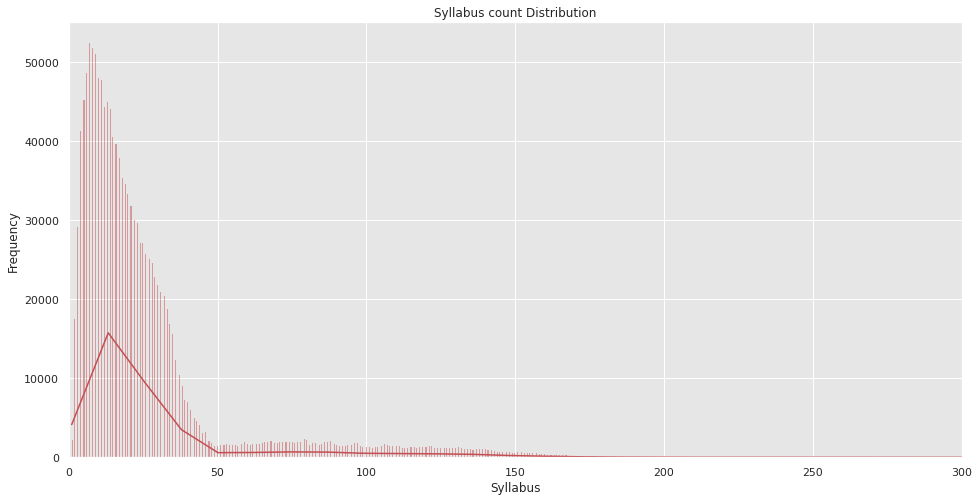

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='sylabbus', data=lem_cleaned_df_new3, kde=True, color='r')
# Add title
plt.title('Syllabus count Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels & define limits
plt.xlim([0, 300])
#plt.ylim([0, 50000])
plt.xlabel("Syllabus")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

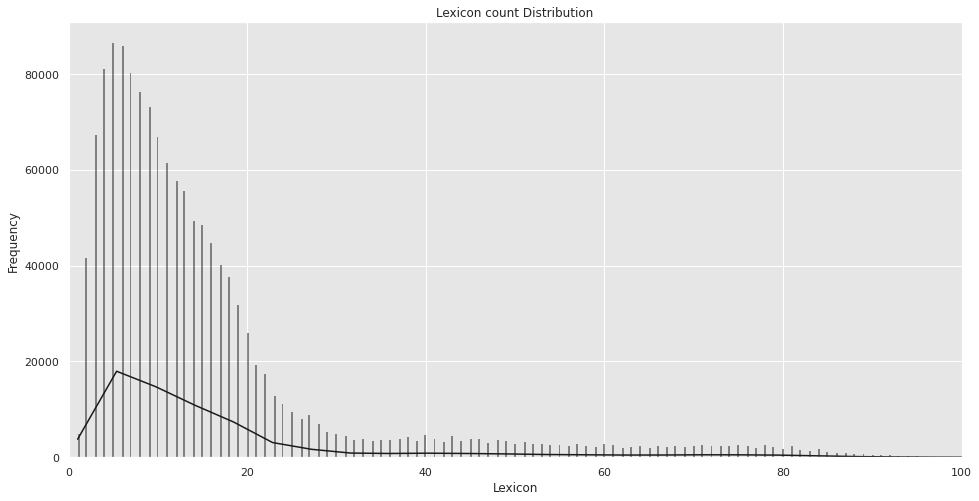

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='lexicon', data=lem_cleaned_df_new3, kde=True, color='k')
# Add title
plt.title('Lexicon count Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels & define limits
plt.xlim([0, 100])
plt.xlabel("Lexicon")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

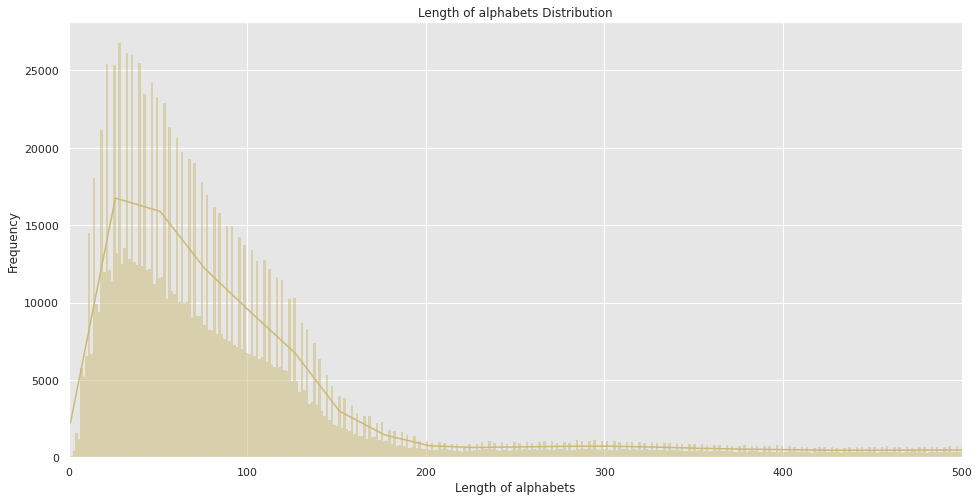

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='length_alphabets', data=lem_cleaned_df_new3, kde=True, color='y')
# Add title
plt.title('Length of alphabets Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels & define limits
plt.xlim([0, 500])
plt.xlabel("Length of alphabets")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

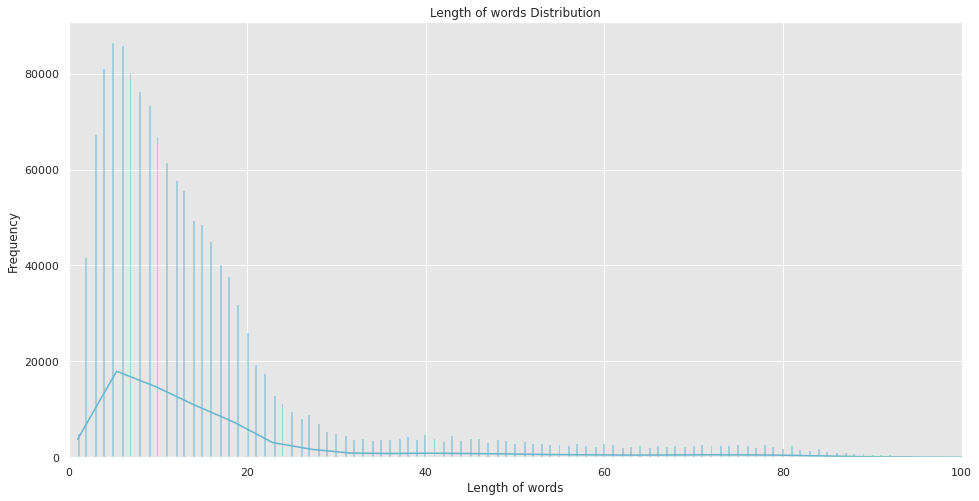

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='length_words', data=lem_cleaned_df_new3, kde=True, color='c')
# Add title
plt.title('Length of words Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels & define limits
plt.xlim([0, 100])
plt.xlabel("Length of words")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

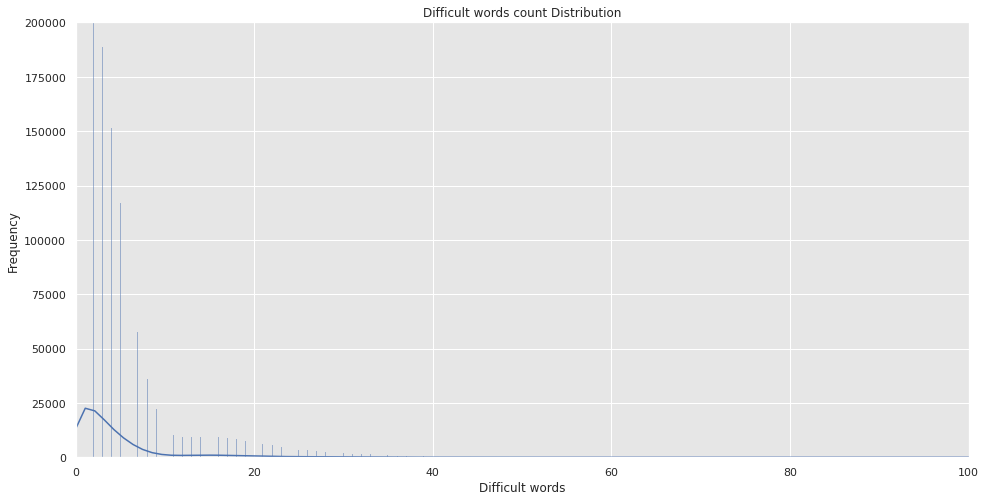

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='diff_words', data=lem_cleaned_df_new3, kde=True, color='b')
# Add title
plt.title('Difficult words count Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels & define limits
plt.xlim([0, 100])
plt.ylim([0, 200000])
plt.xlabel("Difficult words")
plt.ylabel("Frequency")

`Main Assumptions`:
* On average the most frequent sylabbus are estimated to be around 20 to 25
* The most frequent words, on average, are around 5 to 6
* The total width of the 26 single lower-case unspaced letters of the alphabet, is lower than 50, while the average words, in use in each comment, is estimated to be 4 to 5
* Some comments contain words difficult to be comprehended which are considered to be around 1 to 3 on average.

* Below the sequence of items in each comment is displayed

In [ ]:
# Defyning the function that calculates the most frequent bi-grams 
def get_top_comment_bigrams(corpus, n=None):
    #Bag of Wrds model with 2 most frequent words
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    #Matrix with occurences : word j & text i
    bag_of_words = vec.transform(corpus)
    #sum of each word in all texts
    sum_words = bag_of_words.sum(axis=0) 
    #sort list of tuples with words & their occurences
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#Importing the library needed for plotting
from sklearn.feature_extraction.text import CountVectorizer

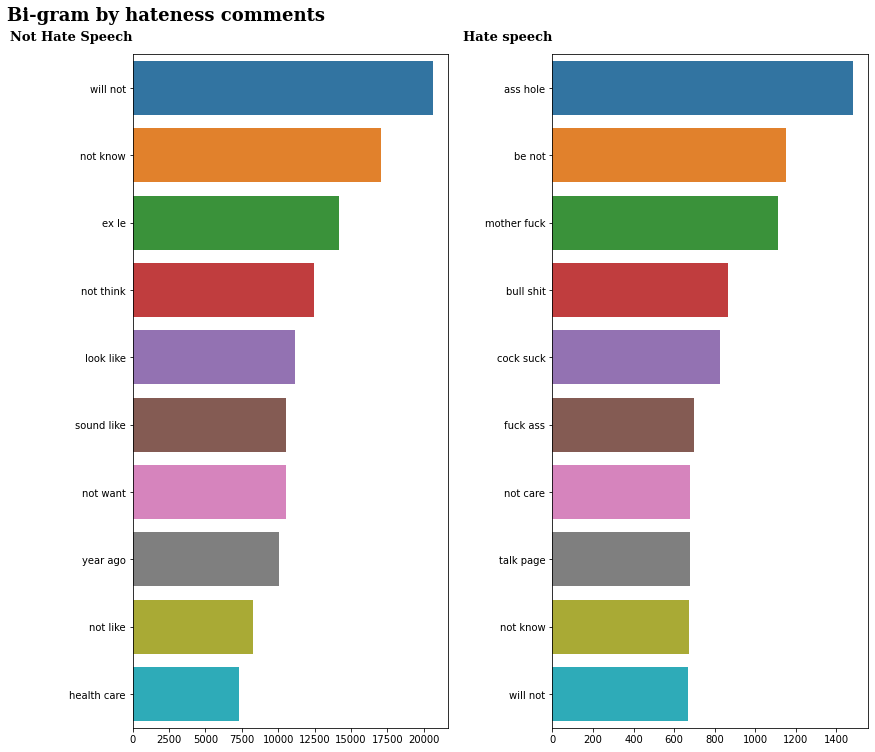

In [ ]:
#Creating the plot of most frequent bi-grams
fig, axes = plt.subplots(1,2, figsize=(12, 10), constrained_layout=True)
#Getting unique values from category column
sentiment_list = list(np.unique(lem_cleaned_df_new3['category']))
#For each category specify the list of n-grams
for i, sentiment in zip(range(3), sentiment_list):
    #detect most frequent bi-grams based on category
    top_comment_bigrams = get_top_comment_bigrams(lem_cleaned_df_new3[lem_cleaned_df_new3['category']==sentiment]['lemmatized'].fillna(" "))[:10]
    #Iterate the upon result in a list 
    x,y = map(list,zip(*top_comment_bigrams))
    sns.barplot(x=y, y=x, ax=axes[i])
    axes[i].text(0,-0.7, "Hate speech" if sentiment == 1 else "Not Hate Speech", fontweight="bold", fontfamily='serif', fontsize=13,ha="right")
    axes[i].patch.set_alpha(0)

fig.text(0,1.01,"Bi-gram by hateness comments", fontweight="bold", fontfamily='serif', fontsize=18)
plt.show()

* Based on the above assumption that per comment there are 5 to 6 words contained, relevant n-grams will be created

In [ ]:
# Defyning the function that calculates the most frequent n-grams 
def get_top_comment_bigrams(corpus, n=None):
    #Bag of Wrds model with 2 most frequent words
    vec = CountVectorizer(ngram_range=(5, 5)).fit(corpus)
    #Matrix with occurences : word j & text i
    bag_of_words = vec.transform(corpus)
    #sum of each word in all texts
    sum_words = bag_of_words.sum(axis=0) 
    #sort list of tuples with words & their occurences
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

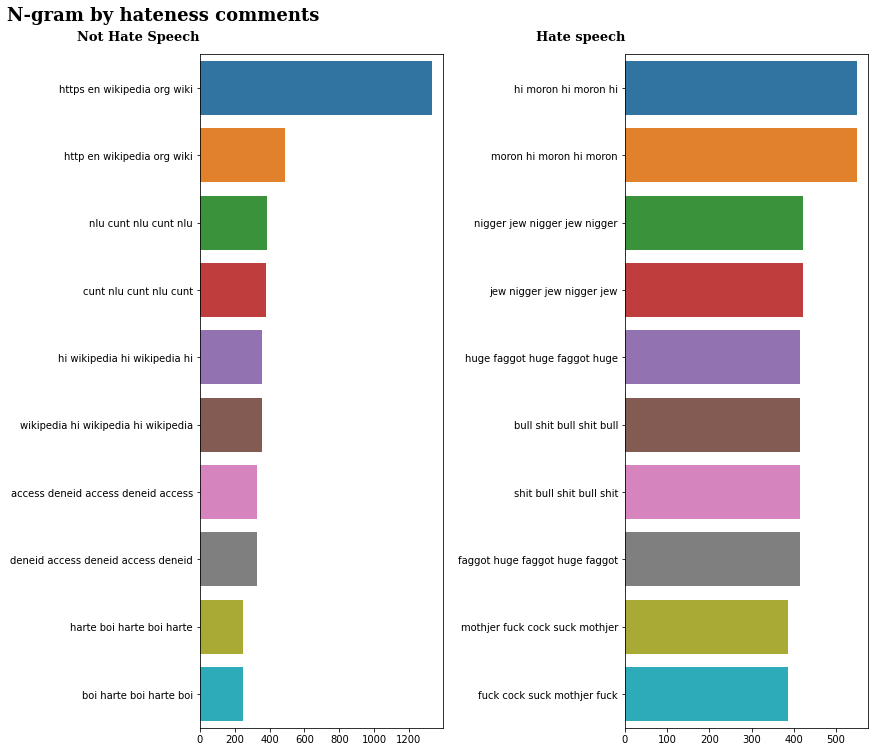

In [ ]:
#Creating the plot of most frequent n-grams
fig, axes = plt.subplots(1,2, figsize=(12, 10), constrained_layout=True)
#Getting unique values from category column
sentiment_list = list(np.unique(lem_cleaned_df_new3['category']))
#For each category specify the list of n-grams
for i, sentiment in zip(range(3), sentiment_list):
    #detect most frequent bi-grams based on category
    top_comment_ngrams = get_top_comment_ngrams(lem_cleaned_df_new3[lem_cleaned_df_new3['category']==sentiment]['lemmatized'].fillna(" "))[:10]
    #Iterate the upon result in a list
    x,y = map(list,zip(*top_comment_ngrams))
    sns.barplot(x=y, y=x, ax=axes[i])
    axes[i].text(0,-0.7, "Hate speech" if sentiment == 1 else "Not Hate Speech", fontweight="bold", fontfamily='serif', fontsize=13,ha="right")
    axes[i].patch.set_alpha(0)

fig.text(0,1.01,"N-gram by hateness comments", fontweight="bold", fontfamily='serif', fontsize=18)
plt.show()

* Α process that began to be tested, had to do with correcting the `wrong` texts with the `right` ones so to proceed in the modeling phase with better data. However, due to technical difficulties & computational cost, this was not applied.

In [ ]:
#Creating a copy of the dataset to show the procedure that we started.
df=lem_cleaned_df_new3.copy()

In [ ]:
#Creating autocorrect function with the use of TextBlob library
def correct_spelling(sentence):
    
    blob = TextBlob(sentence)
    return str(blob.correct())

In [ ]:
#Auto-Correcting text data
df['speller'] = df['lemmatized'][0:100].apply(lambda x: correct_spelling(x))

In [ ]:
df[0:100]

,category,lemmatized,speller
0,0,yes sort remind eld lady play movie titanic te...,yes sort remind old lady play movie titanic te...
1,0,lady buy gun learn use effectively kill mother...,lady buy gun learn use effectively kill mother...
2,0,amazing dad not forget girl crushs girl mom as...,amazing dad not forget girl crush girl mon ask...
3,0,delon love turkey brave turk indian muslim sha...,melon love turkey brave turk indian muslin sha...
4,0,here thing person earth decide not matter feel...,here thing person earth decide not matter feel...
...,...,...,...
95,0,not mad ray charle not niggas shii hit like ho...,not mad ray charge not nights ship hit like ho...
96,0,speak question answer taylor officially come s...,speak question answer taylor officially come s...
97,0,modisarkar watch extraordinary gesture iconic ...,modisarkar watch extraordinary gesture ironic ...
98,0,mentally ill extremely vague term apply point ...,mentally ill extremely vague term apply point ...
